In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
import pandas as pd
from scipy import interpolate
import seaborn as sns
from scipy.integrate import odeint

In [2]:
path2=r'C:\Users\pc\Documents\school\Placental-Transmission-main\Placental-Transmission-main'

In [3]:
path=r'C:\Users\pc\Documents\school\Placental-Transmission-main\Placental-Transmission-main'

In [4]:
Monkey18qchip=pd.read_csv(path+'/18x273-98CMV-seronegativePrimaryInfecqchip.csv')
Monkey19qchip=pd.read_csv(path+'/19x223-98CMV-seronegativePrimaryInfecqchip.csv')
Monkey20qchip=pd.read_csv(path+'/20x251-05CMV-seronegativePrimaryInfecqchip.csv')

In [5]:
healthy_pop=pd.read_csv(path+'/healthy populationflow.csv')

In [6]:
immune_supressed=pd.read_csv(path+'/immunesupressed_monkeyflow.csv')

In [7]:
pop_info=pd.read_csv(path+'/popflow.csv')

In [8]:
trimester=pd.read_excel(path+'/trimester.xlsx')

In [9]:
cd4_primary_infection=pd.read_csv(path+'/cd4+ depl primary infection.csv')

In [10]:
Animal_data=pd.read_csv('immunecompetent data.csv')

In [11]:
cd4_Animal_data=pd.read_csv('cd4 depl data.csv')

In [12]:
Animal=pd.read_csv('monkey-data.csv')

In [13]:
cd4_Animal_data[(cd4_Animal_data['id']=='174-97')].iloc[:-1,:]

,time (day),id,observation vl in militer,censoring,limit,plot,hollow
38,-20,174-97,0.000000,1,1.0,0.000000,0
39,0,174-97,0.000000,1,1.0,0.000000,0
40,7,174-97,5.275311,0,NaN,5.275311,0
41,14,174-97,6.606381,0,NaN,6.606381,0
42,21,174-97,6.875396,0,NaN,6.875396,0


(-44.8, 166)

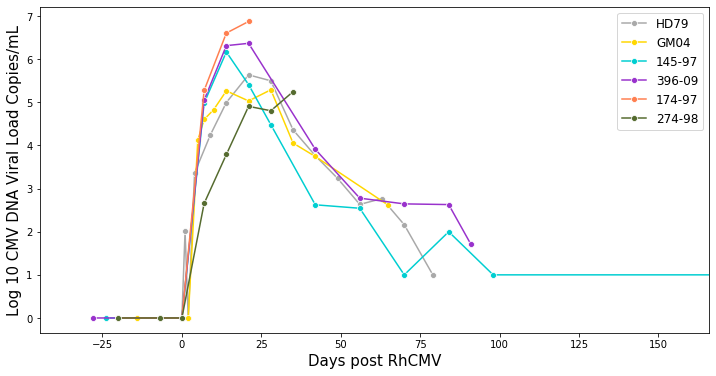

In [14]:
fig,axes=plt.subplots(1,1,sharex='col',figsize=(12,6))
sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='HD79')], x= 'time (day)', y='plot',color='darkgray',marker='o',label='HD79')

sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='GM04')], x= 'time (day)', y='plot',color='gold',marker='o',label='GM04')
sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='145-97')], x= 'time (day)', y='plot',color='darkturquoise',marker='o',label='145-97')
sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='396-09')], x= 'time (day)', y='plot',color='darkorchid',marker='o',label='396-09')
sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='174-97')].iloc[:-1,:], x= 'time (day)', y='plot',color='coral',marker='o',label='174-97')
sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='274-98')].iloc[:-1,:], x= 'time (day)', y='plot',color='darkolivegreen',marker='o',label='274-98')
axes.legend(loc=1,fontsize=12)
axes.set_ylabel('Log 10 CMV DNA Viral Load Copies/mL',fontsize=15)
axes.set_xlabel('Days post RhCMV',fontsize=15)
axes.set_xlim(xmax=166)

(-39.9, 166)

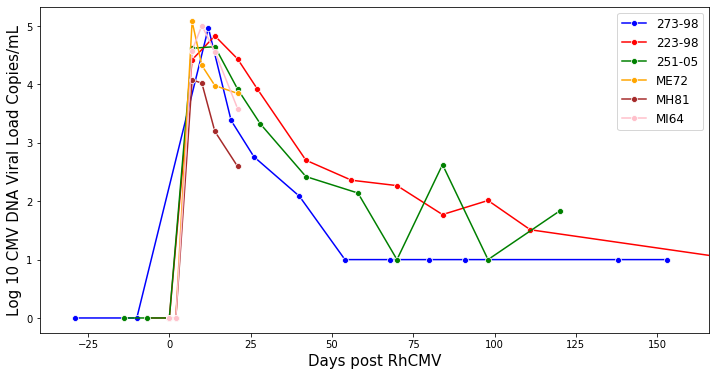

In [15]:
fig,axes=plt.subplots(1,1,sharex='col',figsize=(12,6))
sns.lineplot(data=Animal_data[(Animal_data['id']=='273-98')], x= 'time (day)', y='plot',color='b',marker='o',label='273-98')


sns.lineplot(data=Animal_data[(Animal_data['id']=='223-98')], x= 'time (day)', y='plot',color='r',marker='o',label='223-98')
sns.lineplot(data=Animal_data[(Animal_data['id']=='251-05')], x= 'time (day)', y='plot',color='g',marker='o',label='251-05')
sns.lineplot(data=Animal_data[(Animal_data['id']=='ME72')], x= 'time (day)', y='observation vl in militer',color='orange',marker='o',label='ME72')
sns.lineplot(data=Animal_data[Animal_data['id']=='MH81'], x= 'time (day)', y='observation vl in militer',color='brown',marker='o',label='MH81')
sns.lineplot(data=Animal_data[Animal_data['id']=='MI64'], x= 'time (day)', y='observation vl in militer',color='pink',marker='o',label='MI64')
axes.legend(loc=1,fontsize=12)
axes.set_ylabel('Log 10 CMV DNA Viral Load Copies/mL',fontsize=15)
axes.set_xlabel('Days post RhCMV',fontsize=15)
axes.set_xlim(xmax=166)

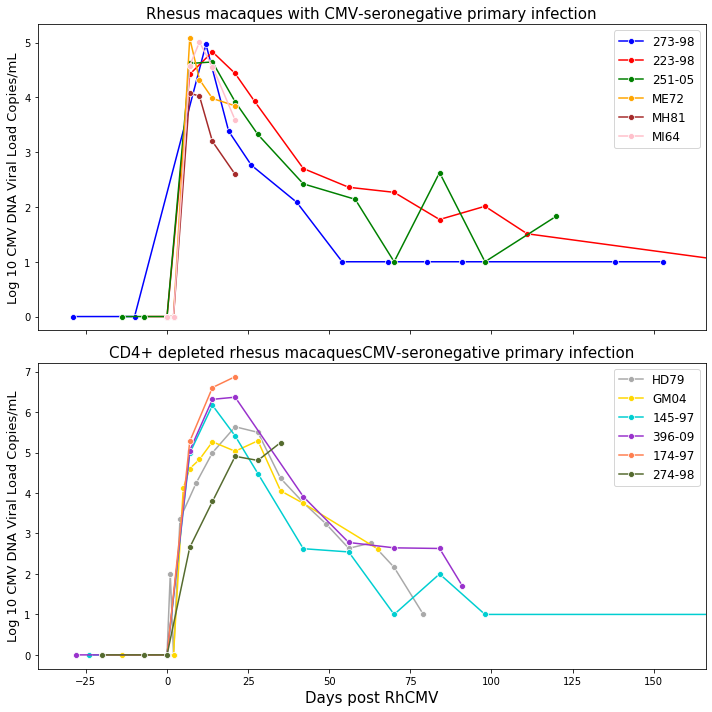

In [27]:
fig,ax=plt.subplots(2,1,sharex='col',figsize=(10,10))
sns.lineplot(data=Animal_data[(Animal_data['id']=='273-98')], x= 'time (day)', y='plot',color='b',marker='o',label='273-98',ax=ax[0])


sns.lineplot(data=Animal_data[(Animal_data['id']=='223-98')], x= 'time (day)', y='plot',color='r',marker='o',label='223-98',ax=ax[0])
sns.lineplot(data=Animal_data[(Animal_data['id']=='251-05')], x= 'time (day)', y='plot',color='g',marker='o',label='251-05',ax=ax[0])
sns.lineplot(data=Animal_data[(Animal_data['id']=='ME72')], x= 'time (day)', y='observation vl in militer',color='orange',marker='o',label='ME72',ax=ax[0])
sns.lineplot(data=Animal_data[Animal_data['id']=='MH81'], x= 'time (day)', y='observation vl in militer',color='brown',marker='o',label='MH81',ax=ax[0])
sns.lineplot(data=Animal_data[Animal_data['id']=='MI64'], x= 'time (day)', y='observation vl in militer',color='pink',marker='o',label='MI64',ax=ax[0])
ax[0].legend(loc=1,fontsize=12)
ax[0].set_ylabel('Log 10 CMV DNA Viral Load Copies/mL',fontsize=13)
ax[0].set_xlabel('Days post RhCMV',fontsize=15)
ax[0].set_xlim(xmax=166)
ax[0].set_title('Rhesus macaques with CMV-seronegative primary infection',fontsize=15)
sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='HD79')], x= 'time (day)', y='plot',color='darkgray',marker='o',label='HD79',ax=ax[1])

sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='GM04')], x= 'time (day)', y='plot',color='gold',marker='o',label='GM04',ax=ax[1])
sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='145-97')], x= 'time (day)', y='plot',color='darkturquoise',marker='o',label='145-97',ax=ax[1])
sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='396-09')], x= 'time (day)', y='plot',color='darkorchid',marker='o',label='396-09',ax=ax[1])
sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='174-97')].iloc[:-1,:], x= 'time (day)', y='plot',color='coral',marker='o',label='174-97',ax=ax[1])
sns.lineplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='274-98')].iloc[:-1,:], x= 'time (day)', y='plot',color='darkolivegreen',marker='o',label='274-98',ax=ax[1])
ax[1].legend(loc=1,fontsize=12)
ax[1].set_ylabel('Log 10 CMV DNA Viral Load Copies/mL',fontsize=13)
ax[1].set_xlabel('Days post RhCMV',fontsize=15)
ax[1].set_xlim(xmax=166)
ax[1].set_title("CD4+ depleted rhesus macaquesCMV-seronegative primary infection",fontsize=15)
plt.tight_layout()

In [66]:
def m1(y, t,ρ,n,δ,c,k,m,α0,κ,λE,λ,e,ϵS,f,rS,rL,tH,tD,Estar,Vstar):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [
        n*δ*y[2] - c*y[0] - f*k*y[3]*y[0],
        (1-ϵS)*(λE*(1 - y[1]/e))*y[1] + ρ*y[0],
        k*y[3]*y[0] - δ*y[2] - (1 - ϵS)*m*y[1]*y[2] + α0*y[4] - κ*y[2],
        λ*(1-y[3]/rS)*y[3] - k*y[3]*y[0],
        λ*(1-y[4]/rL)*y[4] - α0*y[4] + κ*y[4]
    ]     

In [67]:
def data_transform(ts,ys_ind):
    ys_ind  = np.log10(np.maximum(np.ones(len(ys_ind)),1000*ys_ind))
    for (i,t) in enumerate(ts):
        if t>10:
            ys_ind[i]=max(1,ys_ind[i])
    return ys_ind

In [73]:
primary_parameters=pd.read_excel('healthy_monkeys.xlsx')

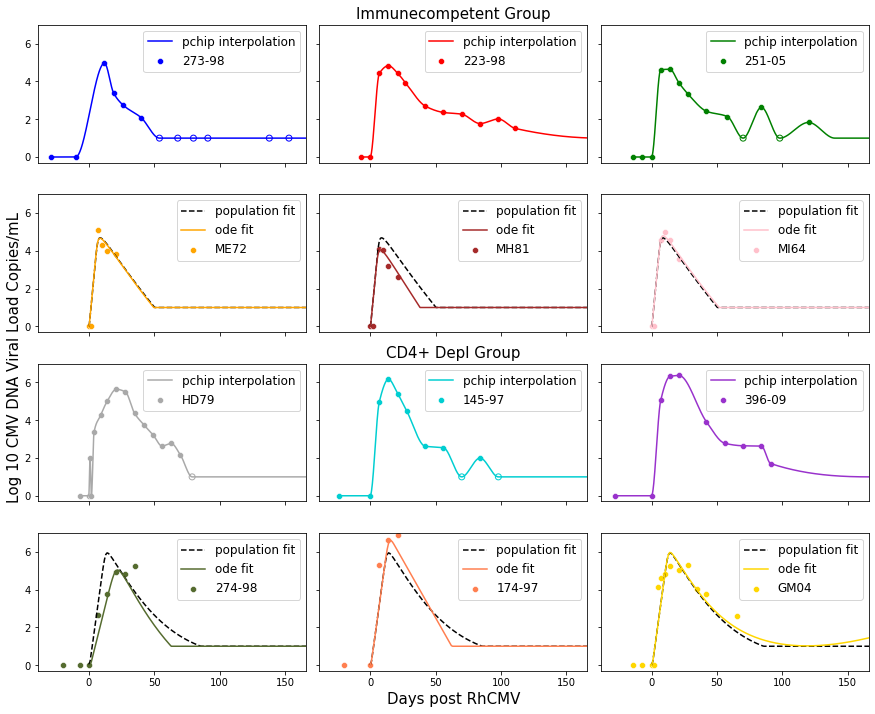

In [95]:
y0 = [1e-3, 0, 0, 5e2, 0]
ts = np.linspace(0,166, 1000)
para_pop=tuple(primary_parameters.iloc[1,1:20].values)
para_paper=tuple(primary_parameters.iloc[0,1:20].values)

ys_pop = odeint(m1, y0, ts,args=para_pop)
ys_paper = odeint(m1, y0, ts,args=para_paper)
ys_pop = data_transform(ts,ys_pop[:,0])

f=PchipInterpolator((Animal_data[(Animal_data['id']=='273-98')])['time (day)'].values,
                                   (Animal_data[(Animal_data['id']=='273-98')])['plot'].values)
time=np.linspace(min((Animal_data[(Animal_data['id']=='273-98')])['time (day)'].values),166, 1000)

d = {'days': time, 
     '273-98': f(time)}
viral_load= pd.DataFrame(data=d)

fig,axes=plt.subplots(4,3,sharex=True,sharey=True,figsize=(12,10))
para=tuple(primary_parameters.iloc[2,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)

sns.scatterplot(
    data=Animal_data[(Animal_data['id']=='273-98')&(Animal_data['hollow']==0)],
    x= 'time (day)', y='plot',ax=axes[0,0],color='b',marker='o',label='273-98')
axes[0,0].scatter(x = (Animal_data[(Animal_data['id']=='273-98')&(Animal_data['hollow']==1)])['time (day)'],
            y=(Animal_data[(Animal_data['id']=='273-98')&(Animal_data['hollow']==1)])['plot'],facecolors='none', edgecolors='b',marker='o')
#axes[0,0].plot(ts,data_transform(ts,ys_ind[:,0]) ,'--',color='b',label='ode fit')

axes[0,0].plot(time,f(time),'b-',label='pchip interpolation')
axes[0,0].set_ylabel('')
axes[0,0].legend(loc=1,fontsize=12)
axes[0,0].set_xlabel('Days post RhCMV',fontsize=15)
axes[0,0].set_xlim(xmax=166)
axes[0,0].set_ylim(ymin=-0.3)
para=tuple(primary_parameters.iloc[3,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)

sns.scatterplot(
    data=Animal_data[(Animal_data['id']=='223-98')&(Animal_data['hollow']==0)],
    x= 'time (day)', y='plot',ax=axes[0,1],color='r',marker='o',label='223-98')
axes[0,1].scatter(x = (Animal_data[(Animal_data['id']=='223-98')&(Animal_data['hollow']==1)])['time (day)'],
            y=(Animal_data[(Animal_data['id']=='223-98')&(Animal_data['hollow']==1)])['plot'],facecolors='none', edgecolors='r',marker='o')
#axes[0,1].plot(ts,data_transform(ts,ys_ind[:,0]) ,'--',color='r',label='ode fit')
f=PchipInterpolator((Animal_data[(Animal_data['id']=='223-98')])['time (day)'].values,
                                   (Animal_data[(Animal_data['id']=='223-98')])['plot'].values)
time=np.linspace(min((Animal_data[(Animal_data['id']=='223-98')])['time (day)'].values),166, 1000)
axes[0,1].plot(time,f(time),'r-',label='pchip interpolation')
axes[0,1].legend(loc=1,fontsize=12)
axes[0,1].set_xlabel('Days post RhCMV',fontsize=15)
axes[0,1].set_xlim(xmax=166)
axes[0,1].set_ylim(ymin=-0.3)
plt.tight_layout()




para=tuple(primary_parameters.iloc[4,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)

sns.scatterplot(
    data=Animal_data[(Animal_data['id']=='251-05')&(Animal_data['hollow']==0)],
    x= 'time (day)', y='plot',ax=axes[0,2],color='g',marker='o',label='251-05')
axes[0,2].scatter(x = (Animal_data[(Animal_data['id']=='251-05')&(Animal_data['hollow']==1)])['time (day)'],
            y=(Animal_data[(Animal_data['id']=='251-05')&(Animal_data['hollow']==1)])['plot'],facecolors='none', edgecolors='g',marker='o')
#axes[0,2].plot(ts,ys_pop, '--',color='k',label='population fit')
f=PchipInterpolator(np.append((Animal_data[(Animal_data['id']=='251-05')])['time (day)'].values,[140,166]),
                                   np.append((Animal_data[(Animal_data['id']=='251-05')])['plot'].values,[1,1]),extrapolate=True)
time=np.linspace(min((Animal_data[(Animal_data['id']=='251-05')])['time (day)'].values),166, 1000)
axes[0,2].plot(time,f(time),label='pchip interpolation',color='g')
axes[0,2].set_ylabel('',fontsize=15)
axes[0,2].legend(loc=1,fontsize=12)
axes[0,2].set_xlabel('Days post RhCMV',fontsize=15)
axes[0,2].set_xlim(xmax=166)
axes[0,2].set_ylim(ymin=-0.3)



para=tuple(primary_parameters.iloc[5,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)

sns.scatterplot(data=Animal_data[(Animal_data['id']=='ME72')], 
                x= 'time (day)', y='observation vl in militer',ax=axes[1,0],color='orange',marker='o',label='ME72')
axes[1,0].plot(ts,ys_pop, '--',color='k',label='population fit')
axes[1,0].plot(ts,data_transform(ts,ys_ind[:,0]), '-',color='orange',label='ode fit')
axes[1,0].set_xlabel('Days post RhCMV',fontsize=15)
axes[1,0].legend(loc=1,fontsize=12)
axes[1,0].set_ylabel('',fontsize=15)
axes[1,0].set_xlim(xmax=166)
axes[1,0].set_ylim(ymin=-0.3)


para=tuple(primary_parameters.iloc[6,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)

sns.scatterplot(data=Animal_data[Animal_data['id']=='MH81'], 
                x= 'time (day)', y='observation vl in militer',ax=axes[1,1],color='brown',marker='o',label='MH81')
axes[1,1].plot(ts,ys_pop, '--',color='k',label='population fit')
axes[1,1].plot(ts,data_transform(ts,ys_ind[:,0]), '-',color='brown',label='ode fit')
axes[1,1].set_ylabel('')
axes[1,1].legend(loc=1,fontsize=12)
axes[1,1].set_xlabel('Days post RhCMV',fontsize=15)
axes[1,1].set_xlim(xmax=166)
axes[1,1].set_ylim(ymin=-0.3)

para=tuple(primary_parameters.iloc[7,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)

sns.scatterplot(data=Animal_data[Animal_data['id']=='MI64'], 
                x= 'time (day)', y='observation vl in militer',ax=axes[1,2],color='pink',marker='o',label='MI64')
axes[1,2].plot(ts,ys_pop, '--',color='k',label='population fit')
axes[1,2].plot(ts,data_transform(ts,ys_ind[:,0]) ,'-',color='pink',label='ode fit')
axes[1,2].set_ylabel('')
axes[1,2].legend(loc=1,fontsize=12)
axes[1,2].set_xlabel('Days post RhCMV',fontsize=15)
axes[1,2].set_xlim(xmax=170)
axes[1,2].set_ylim(ymin=-0.3)
axes[1,2].set_xlabel('Days post RhCMV',fontsize=15)

y0 = [1e-3, 0, 0, 5e2, 0]
ts = np.linspace(0,1000, 1000)
para_pop=tuple(cd4_parameters.iloc[1,1:20].values)
para_paper=tuple(cd4_parameters.iloc[0,1:20].values)

ys_pop = odeint(m1, y0, ts,args=para_pop)
ys_paper = odeint(m1, y0, ts,args=para)


#fig,axes=plt.subplots(2,3,sharex=True,sharey=True,figsize=(12,6))

sns.scatterplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='HD79')&(cd4_Animal_data['hollow']==0)], x= 'time (day)', y='plot',ax=axes[2,0],color='darkgray',marker='o',label='HD79')
axes[2,0].scatter(x = (cd4_Animal_data[(cd4_Animal_data['id']=='HD79')&(cd4_Animal_data['hollow']==1)])['time (day)'],
            y=(cd4_Animal_data[(cd4_Animal_data['id']=='HD79')&(cd4_Animal_data['hollow']==1)])['plot'],facecolors='none', edgecolors='darkgray',marker='o')

para=tuple(cd4_parameters.iloc[2,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)
#axes[0,0].plot(ts,data_transform(ts,ys_pop[:,0]), '--',color='k',label='population fit')
#axes[0,0].plot(ts,data_transform(ts,ys_ind[:,0]), '-',color='darkgray',label='ode fit')


axes[2,0].set_xlabel('Days post RhCMV',fontsize=15)
axes[2,0].set_ylabel('')
axes[2,0].set_xlim(xmax=166)
axes[2,0].set_ylim(ymin=-0.3)
axes[2,0].legend(loc=1,fontsize=12)


f=PchipInterpolator(np.append((cd4_Animal_data[cd4_Animal_data['id']=='HD79'])['time (day)'].values,166),
                                   np.append((cd4_Animal_data[cd4_Animal_data['id']=='HD79'])['plot'].values,1),extrapolate=True)
time=np.linspace(min((cd4_Animal_data[cd4_Animal_data['id']=='HD79'])['time (day)'].values),166, 1000)

axes[2,0].plot(time,f(time),color='darkgray',label='pchip interpolation')

axes[2,0].legend(loc=1,fontsize=12)

plt.tight_layout()




para=tuple(cd4_parameters.iloc[4,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)

#sns.scatterplot(data=cd4_Animal_data[cd4_Animal_data['id']=='274-98'], x= 'time (day)', y='observation vl in militer',ax=axes[1,0],color='g',marker='o',label='274-98')

sns.scatterplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='274-98')&(cd4_Animal_data['hollow']==0)], x= 'time (day)', y='plot',ax=axes[3,0],color='darkolivegreen',marker='o',label='274-98')
#axes[1,0].scatter(x = (cd4_Animal_data[(cd4_Animal_data['id']=='274-98')&(cd4_Animal_data['hollow']==1)])['time (day)'],
#            y=(cd4_Animal_data[(cd4_Animal_data['id']=='274-98')&(cd4_Animal_data['hollow']==1)])['plot'],facecolors='none', edgecolors='darkolivegreen',marker='o')


axes[3,0].plot(ts,data_transform(ts,ys_pop[:,0]), '--',color='k',label='population fit')
axes[3,0].plot(ts,data_transform(ts,ys_ind[:,0]), '-',color='darkolivegreen',label='ode fit')
axes[3,0].set_ylabel('')
axes[3,0].legend(loc=1,fontsize=12)
axes[3,0].set_xlabel('',fontsize=15)
axes[3,0].set_xlim(xmax=166)
axes[3,0].set_ylim(ymin=-0.3)



para=tuple(cd4_parameters.iloc[5,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)

#sns.scatterplot(data=cd4_Animal_data[cd4_Animal_data['id']=='174-97'], x= 'time (day)', y='observation vl in militer',ax=axes[1,1],color='orange',marker='o',label='174-97')

sns.scatterplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='174-97')&(cd4_Animal_data['hollow']==0)], x= 'time (day)', y='plot',ax=axes[3,1],color='coral',marker='o',label='174-97')
#axes[1,1].scatter(x = (cd4_Animal_data[(cd4_Animal_data['id']=='174-97')&(cd4_Animal_data['hollow']==1)])['time (day)'],
#            y=(cd4_Animal_data[(cd4_Animal_data['id']=='174-97')&(cd4_Animal_data['hollow']==1)])['plot'],facecolors='none', edgecolors='coral',marker='o')


axes[3,1].plot(ts,data_transform(ts,ys_pop[:,0]), '--',color='k',label='population fit')
axes[3,1].plot(ts,data_transform(ts,ys_ind[:,0]), '-',color='coral',label='ode fit')

axes[3,1].legend(loc=1,fontsize=12)
axes[3,1].set_xlabel('Days post RhCMV',fontsize=15)
axes[3,1].set_xlim(xmax=166)
axes[3,1].set_ylim(ymin=-0.3)


para=tuple(cd4_parameters.iloc[6,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)

sns.scatterplot(data=cd4_Animal_data[cd4_Animal_data['id']=='396-09'], x= 'time (day)', y='observation vl in militer',ax=axes[2,2],color='darkorchid',marker='o',label='396-09')



#axes[0,2].plot(ts,data_transform(ts,ys_pop[:,0]), '--',color='k',label='population fit')
#axes[0,2].plot(ts,data_transform(ts,ys_ind[:,0]), '-',color='darkorchid',label='ode fit')
axes[2,2].set_ylabel('')

axes[2,2].set_xlabel('Days post RhCMV',fontsize=15)
axes[2,2].set_xlim(xmax=166)
axes[2,2].set_ylim(ymin=-0.3)



f=PchipInterpolator(np.append((cd4_Animal_data[cd4_Animal_data['id']=='396-09'])['time (day)'].values,166),
                                   np.append((cd4_Animal_data[cd4_Animal_data['id']=='396-09'])['plot'].values,1),extrapolate=True)
time=np.linspace(min((cd4_Animal_data[cd4_Animal_data['id']=='396-09'])['time (day)'].values),166, 1000)

axes[2,2].plot(time,f(time),color='darkorchid',label='pchip interpolation')
axes[2,2].legend(loc=1,fontsize=12)

para=tuple(cd4_parameters.iloc[7,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)

#sns.scatterplot(data=cd4_Animal_data[cd4_Animal_data['id']=='145-97'], x= 'time (day)', y='observation vl in militer',ax=axes[2,1],color='coral',marker='o',label='145-97')
sns.scatterplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='145-97')&(cd4_Animal_data['hollow']==0)], x= 'time (day)', y='plot',ax=axes[2,1],color='darkturquoise',marker='o',label='145-97')
axes[2,1].scatter(x = (cd4_Animal_data[(cd4_Animal_data['id']=='145-97')&(cd4_Animal_data['hollow']==1)])['time (day)'],
            y=(cd4_Animal_data[(cd4_Animal_data['id']=='145-97')&(cd4_Animal_data['hollow']==1)])['plot'],facecolors='none', edgecolors='darkturquoise',marker='o')

#axes[0,1].plot(ts,data_transform(ts,ys_pop[:,0]), '--',color='k',label='population fit')
#axes[0,1].plot(ts,data_transform(ts,ys_ind[:,0]), '-',color='darkturquoise',label='ode fit')
axes[2,1].set_ylabel('')

#axes[2,1].set_xlabel('Days post RhCMV',fontsize=15)
axes[2,1].set_xlim(xmax=166)
axes[2,1].set_ylim(ymin=-0.3,ymax=7)



f=PchipInterpolator((cd4_Animal_data[cd4_Animal_data['id']=='145-97'])['time (day)'].values,
                                   (cd4_Animal_data[cd4_Animal_data['id']=='145-97'])['plot'].values,extrapolate=True)
time=np.linspace(min((cd4_Animal_data[cd4_Animal_data['id']=='145-97'])['time (day)'].values),166, 1000)

axes[2,1].plot(time,f(time),color='darkturquoise',label='pchip interpolation')
axes[2,1].legend(loc=1,fontsize=12)

para=tuple(cd4_parameters.iloc[3,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)


sns.scatterplot(data=cd4_Animal_data[(cd4_Animal_data['id']=='GM04')&(cd4_Animal_data['hollow']==0)], 
                x= 'time (day)', y='plot',ax=axes[3,2],color='gold',marker='o',label='GM04')
axes[3,2].scatter(x = (cd4_Animal_data[(cd4_Animal_data['id']=='GM04')&(cd4_Animal_data['hollow']==1)])['time (day)'],
            y=(cd4_Animal_data[(cd4_Animal_data['id']=='GM04')&(cd4_Animal_data['hollow']==1)])['plot'],facecolors='none', edgecolors='gold',marker='o')

axes[3,2].plot(ts,data_transform(ts,ys_pop[:,0]), '--',color='k',label='population fit')
axes[3,2].plot(ts,data_transform(ts,ys_ind[:,0]), '-',color='gold',label='ode fit')

axes[3,2].legend(loc=1,fontsize=12)
axes[3,2].set_xlabel('',fontsize=15)
axes[3,2].set_xlim(xmax=166)
axes[3,2].set_ylim(ymin=-0.3)
fig.text(0, 0.5, 'Log 10 CMV DNA Viral Load Copies/mL', ha='center', va='center', rotation='vertical',fontsize=15)
axes[0,1].set_title('Immunecompetent Group',fontsize=15)
axes[2,1].set_title('CD4+ Depl Group',fontsize=15)
plt.tight_layout(pad=1.0)

In [221]:
y0 = [1e-3, 0, 0, 5e2, 0]
ts = np.linspace(0,166, 1000)
para_pop=tuple(cd4_parameters.iloc[1,1:20].values)

#para=tuple(cd4_parameters.iloc[6,1:20].values)
ys_ind = odeint(m1, y0, ts,args=para)
ys_pop = odeint(m1, y0, ts,args=para_pop)

cd4_parameters.iloc[6,0]

d = {'pop': ys_pop[:,0]}
df = pd.DataFrame(data=d)

df[df['pop']<0]=0

for i in [2,3,4,5,6,7]:
    para=tuple(cd4_parameters.iloc[i,1:20].values)
    ys_ind = odeint(m1, y0, ts,args=para)
    df[cd4_parameters.iloc[i,0]]=ys_ind[:,0]
    df[df[cd4_parameters.iloc[i,0]]<0]=0

df['t']=ts
df.to_csv('immunesupressed.csv')

In [222]:
y0 = [1e-3, 0, 0, 5e2, 0]
ts = np.linspace(0,450, 2000)
para_pop=tuple(primary_parameters.iloc[1,1:20].values)
para_paper=tuple(primary_parameters.iloc[0,1:20].values)

ys_pop = odeint(m1, y0, ts,args=para_pop)

In [223]:
para_pop1=tuple(cd4_parameters.iloc[1,1:20].values)
ys_pop1 = odeint(m1, y0, ts,args=para_pop1)

Text(0.5, 1.0, 'Chronic Infection')

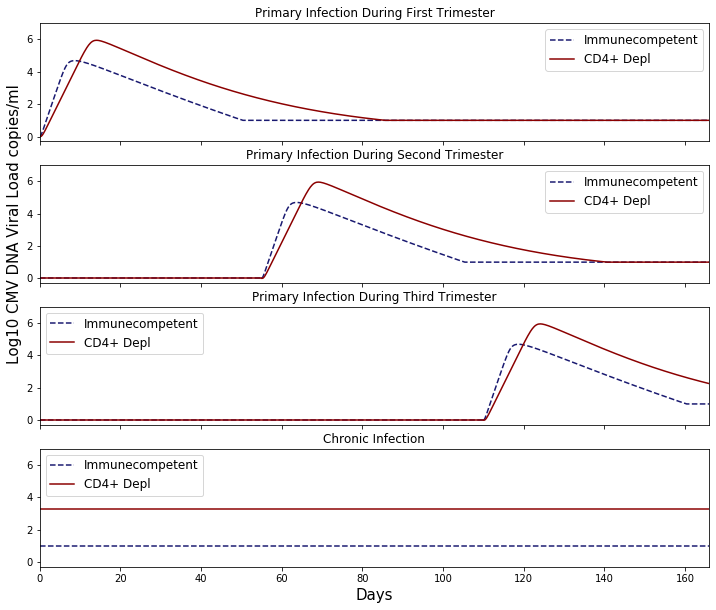

<Figure size 864x432 with 0 Axes>

In [252]:
fig,axes=plt.subplots(4,1,sharex=True,sharey=True,figsize=(12,10))
plt.figure(figsize=(12,6))
axes[0].plot(ts,data_transform(ts,ys_pop[:,0]), '--',color='midnightblue',label='Immunecompetent')
axes[0].plot(ts,data_transform(ts,ys_pop1[:,0]),color='darkred',label='CD4+ Depl')
axes[0].set_xlim(xmin=0,xmax=166)
axes[0].set_ylim(ymin=-0.3,ymax=7)
axes[0].legend(fontsize=12,loc=1)
axes[0].set_title('Primary Infection During First Trimester')


axes[1].plot(55+ts,data_transform(ts,ys_pop[:,0]), '--',color='midnightblue',label='Immunecompetent')
axes[1].plot(55+ts,data_transform(ts,ys_pop1[:,0]),color='darkred',label='CD4+ Depl')
axes[1].legend(fontsize=12,loc=1)
axes[1].axhline(y=0,xmax=55/166,linestyle='--',color='midnightblue')
axes[1].axhline(y=0,xmax=55/166,color='darkred')
axes[1].set_title('Primary Infection During Second Trimester')


axes[2].plot(110+ts,data_transform(ts,ys_pop[:,0]), '--',color='midnightblue',label='Immunecompetent')
axes[2].plot(110+ts,data_transform(ts,ys_pop1[:,0]),color='darkred',label='CD4+ Depl')
axes[2].legend(fontsize=12,loc=2)
axes[2].axhline(y=0,xmax=110/166,linestyle='--',color='midnightblue')
axes[2].axhline(y=0,xmax=110/166,color='darkred')
axes[2].set_title('Primary Infection During Third Trimester')



axes[3].axhline(y=1,linestyle='--',color='midnightblue',label='Immunecompetent')
axes[3].axhline(y=3.29,color='darkred',label='CD4+ Depl')
#axes[1].plot(ts,data_transform(ts,ys_pop1[:,0]),color='darkred',label='CD4+ Depl population fit')
axes[1].set_ylabel('Log10 CMV DNA Viral Load copies/ml',fontsize=15)
axes[3].legend(fontsize=12,loc=2)
axes[3].set_xlabel('Days')
axes[3].set_title('Chronic Infection')

In [231]:
trimester

,days,cd4 chronic,healthy chronic,healthy second,healthy third,cd4 second,suppressed third,cd4 first,healthy first,cd4 third
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.166166,1.041134e-23,3.197444e-19,2.936764e-12,2.936764e-12,2.936764e-12,2.936764e-12,2.760000e-12,3.130000e-12,2.936764e-12
2,0.332332,5.935184e-13,5.809499e-12,3.752084e-10,3.752084e-10,3.752084e-10,3.752084e-10,4.360000e-10,3.960000e-10,3.752084e-10
3,0.498498,1.209004e-08,9.588489e-09,2.196237e-07,2.196237e-07,2.196237e-07,2.196237e-07,2.760000e-07,2.930000e-07,2.196237e-07
4,0.664665,2.850536e-06,1.906519e-07,1.007932e-06,1.007932e-06,1.007932e-06,1.007932e-06,1.170000e-06,1.300000e-06,1.007932e-06
...,...,...,...,...,...,...,...,...,...,...
995,165.335335,1.396736e+01,7.163319e-02,9.752397e-06,5.094213e-02,3.077226e-02,2.318761e+00,1.815923e-03,0.000000e+00,2.318761e+00
996,165.501501,1.397438e+01,7.166918e-02,9.621922e-06,4.937821e-02,3.068249e-02,2.260667e+00,1.577967e-03,0.000000e+00,2.260667e+00
997,165.667668,1.398137e+01,7.170504e-02,9.486278e-06,4.786526e-02,3.059405e-02,2.204242e+00,1.339769e-03,0.000000e+00,2.204242e+00
998,165.833834,1.398834e+01,7.174077e-02,9.345459e-06,4.640086e-02,3.050691e-02,2.149458e+00,1.101330e-03,0.000000e+00,2.149458e+00


In [254]:
def data_transform(ts,ys_ind,num):
    ys_ind  = np.log10(np.maximum(np.ones(len(ys_ind)),1000*ys_ind))
    for (i,t) in enumerate(ts):
        if t>num:
            ys_ind[i]=max(1,ys_ind[i])
    return ys_ind

Text(0, 0.5, 'Log10 CMV DNA Viral Load copies/(ml*mm*day)')

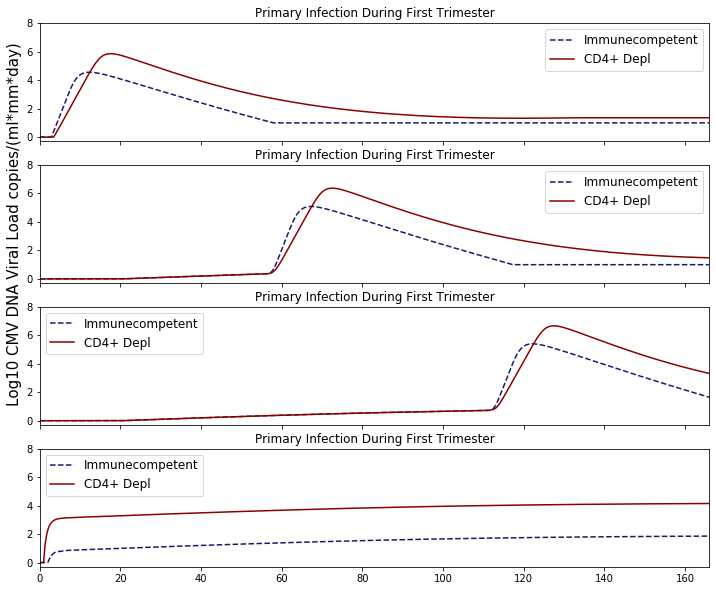

<Figure size 864x432 with 0 Axes>

In [261]:
fig,axes=plt.subplots(4,1,sharex=True,sharey=True,figsize=(12,10))
plt.figure(figsize=(12,6))
axes[0].plot(trimester['days'],data_transform(trimester['days'],trimester['healthy first'],10),'--',color='midnightblue',label='Immunecompetent')
axes[0].plot(trimester['days'],data_transform(trimester['days'],trimester['cd4 first'],10),color='darkred',label='CD4+ Depl')
axes[0].set_xlim(xmin=0,xmax=166)
axes[0].set_ylim(ymin=-0.3,ymax=7)
axes[0].legend(fontsize=12,loc=1)
axes[0].set_title('Primary Infection During First Trimester')


axes[1].plot(trimester['days'],data_transform(trimester['days'],trimester['healthy second'],65),'--',color='midnightblue',label='Immunecompetent')
axes[1].plot(trimester['days'],data_transform(trimester['days'],trimester['cd4 second'],65),color='darkred',label='CD4+ Depl')
#axes[1].axhline(y=0,xmax=55/166,linestyle='--',color='midnightblue')
#axes[1].axhline(y=0,xmax=55/166,color='darkred')
axes[1].set_xlim(xmin=0,xmax=166)
axes[1].set_ylim(ymin=-0.3,ymax=7)
axes[1].legend(fontsize=12,loc=1)
axes[1].set_title('Primary Infection During First Trimester')


axes[2].plot(trimester['days'],data_transform(trimester['days'],trimester['healthy third'],130),'--',color='midnightblue',label='Immunecompetent')
axes[2].plot(trimester['days'],data_transform(trimester['days'],trimester['cd4 third'],130),color='darkred',label='CD4+ Depl')
axes[2].set_xlim(xmin=0,xmax=166)
axes[2].set_ylim(ymin=-0.3,ymax=7)
axes[2].legend(fontsize=12,loc=2)
#axes[2].axhline(y=0,xmax=110/166,linestyle='--',color='midnightblue')
#axes[2].axhline(y=0,xmax=110/166,color='darkred')
axes[2].set_title('Primary Infection During First Trimester')



axes[3].plot(trimester['days'],data_transform(trimester['days'],trimester['healthy chronic'],100),'--',color='midnightblue',label='Immunecompetent')
axes[3].plot(trimester['days'],data_transform(trimester['days'],trimester['cd4 chronic'],100) ,color='darkred',label='CD4+ Depl')
axes[3].set_xlim(xmin=0,xmax=166)
axes[3].set_ylim(ymin=-0.3,ymax=8)
axes[3].legend(fontsize=12,loc=2)
axes[3].set_title('Primary Infection During First Trimester')

axes[1].set_ylabel('Log10 CMV DNA Viral Load copies/(ml*mm*day)',fontsize=15)

In [112]:
def cumulative_prob(flux,time,prob):
    cumulative=[]
    for i in range(len(flux)):
        cumulative.append(np.trapz(flux[:i],time[:i]))
    return 1-np.power(1-prob,cumulative)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(healthy_pop[healthy_pop.columns[0]],cumulative_prob(healthy_pop[healthy_pop.columns[2]],healthy_pop[healthy_pop.columns[0]],0.00046)  ,'k', label='Immunecompetent pop fit')
plt.plot(healthy_pop[healthy_pop.columns[0]],cumulative_prob(healthy_pop[healthy_pop.columns[4]],healthy_pop[healthy_pop.columns[0]],0.00046)  ,'b', label=healthy_pop.columns[3])
plt.plot(healthy_pop[healthy_pop.columns[0]],cumulative_prob(healthy_pop[healthy_pop.columns[6]],healthy_pop[healthy_pop.columns[0]],0.00046)  ,'r', label=healthy_pop.columns[5])
plt.plot(healthy_pop[healthy_pop.columns[0]],cumulative_prob(healthy_pop[healthy_pop.columns[8]],healthy_pop[healthy_pop.columns[0]],0.00046)  ,'g', label=healthy_pop.columns[7])

plt.plot(healthy_pop[healthy_pop.columns[0]],cumulative_prob(healthy_pop[healthy_pop.columns[10]],healthy_pop[healthy_pop.columns[0]],0.00046)  ,'orange', label=healthy_pop.columns[9])

plt.plot(healthy_pop[healthy_pop.columns[0]],cumulative_prob(healthy_pop[healthy_pop.columns[12]],healthy_pop[healthy_pop.columns[0]],0.00046)  ,'brown', label=healthy_pop.columns[11])
plt.plot(healthy_pop[healthy_pop.columns[0]],cumulative_prob(healthy_pop[healthy_pop.columns[14]],healthy_pop[healthy_pop.columns[0]],0.00046)  ,'pink', label=healthy_pop.columns[13])
#plt.plot(Simulation['time'],cumulative_prob(Simulation['0.7_2'],Simulation['time'],0.00046)   ,'b', label="2nd Trimester")
#plt.plot(Simulation['time'],cumulative_prob(Simulation['0.7_3'],Simulation['time'],0.00046)  ,'g', label="3rd Trimester")
plt.xlabel('Time (days)',fontsize=15)
#plt.title('Maternal primary infection with immune suppression level ϵS = 0.7',fontsize=14)
plt.ylabel('Cumulative probability of infection',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=2)
plt.rc('axes', labelsize=15)
plt.ylim(ymax=1,ymin=0)
plt.legend(loc=1,fontsize=14)
#plt.savefig(r'C:\Users\pc\Desktop\cmv\Maternal primary infection with immune suppression level ϵS = 0.7.png')
plt.show()

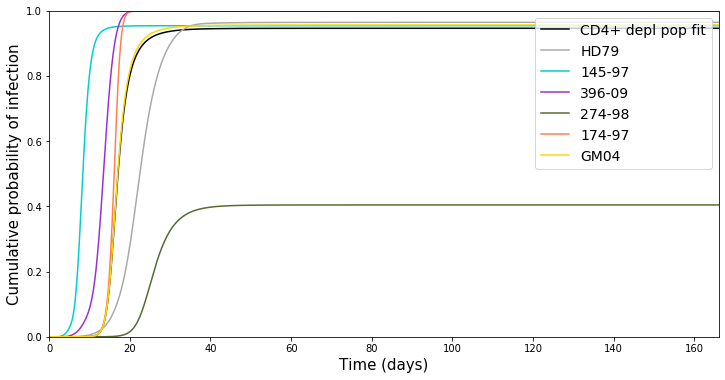

In [124]:
plt.figure(figsize=(12,6))
plt.plot(immune_supressed[immune_supressed.columns[0]],cumulative_prob(immune_supressed[immune_supressed.columns[2]],immune_supressed[immune_supressed.columns[0]],0.00046)  ,'k', label='CD4+ depl pop fit')
plt.plot(immune_supressed[immune_supressed.columns[0]],cumulative_prob(immune_supressed[immune_supressed.columns[4]],immune_supressed[immune_supressed.columns[0]],0.00046)  ,'darkgray', label=immune_supressed.columns[3])
plt.plot(immune_supressed[immune_supressed.columns[0]],cumulative_prob(immune_supressed[immune_supressed.columns[6]],immune_supressed[immune_supressed.columns[0]],0.00046)  ,'darkturquoise', label=immune_supressed.columns[5])
plt.plot(immune_supressed[immune_supressed.columns[0]],cumulative_prob(immune_supressed[immune_supressed.columns[8]],immune_supressed[immune_supressed.columns[0]],0.00046)  ,'darkorchid', label=immune_supressed.columns[7])

plt.plot(immune_supressed[immune_supressed.columns[0]],cumulative_prob(immune_supressed[immune_supressed.columns[10]],immune_supressed[immune_supressed.columns[0]],0.00046)  ,'darkolivegreen', label=immune_supressed.columns[9])

plt.plot(immune_supressed[immune_supressed.columns[0]],cumulative_prob(immune_supressed[immune_supressed.columns[12]],immune_supressed[immune_supressed.columns[0]],0.00046)  ,'coral', label=immune_supressed.columns[11])
plt.plot(immune_supressed[immune_supressed.columns[0]],cumulative_prob(immune_supressed[immune_supressed.columns[14]],immune_supressed[immune_supressed.columns[0]],0.00046)  ,'gold', label=immune_supressed.columns[13])
#plt.plot(Simulation['time'],cumulative_prob(Simulation['0.7_2'],Simulation['time'],0.00046)   ,'b', label="2nd Trimester")
#plt.plot(Simulation['time'],cumulative_prob(Simulation['0.7_3'],Simulation['time'],0.00046)  ,'g', label="3rd Trimester")
plt.xlabel('Time (days)',fontsize=15)
#plt.title('Maternal primary infection with immune suppression level ϵS = 0.7',fontsize=14)
plt.ylabel('Cumulative probability of infection',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=2)
plt.rc('axes', labelsize=15)
plt.ylim(ymax=1,ymin=0)
plt.legend(loc=1,fontsize=14)
#plt.savefig(r'C:\Users\pc\Desktop\cmv\Maternal primary infection with immune suppression level ϵS = 0.7.png')
plt.show()

In [262]:
trimester

,days,cd4 chronic,healthy chronic,healthy second,healthy third,cd4 second,suppressed third,cd4 first,healthy first,cd4 third
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.166166,1.041134e-23,3.197444e-19,2.936764e-12,2.936764e-12,2.936764e-12,2.936764e-12,2.760000e-12,3.130000e-12,2.936764e-12
2,0.332332,5.935184e-13,5.809499e-12,3.752084e-10,3.752084e-10,3.752084e-10,3.752084e-10,4.360000e-10,3.960000e-10,3.752084e-10
3,0.498498,1.209004e-08,9.588489e-09,2.196237e-07,2.196237e-07,2.196237e-07,2.196237e-07,2.760000e-07,2.930000e-07,2.196237e-07
4,0.664665,2.850536e-06,1.906519e-07,1.007932e-06,1.007932e-06,1.007932e-06,1.007932e-06,1.170000e-06,1.300000e-06,1.007932e-06
...,...,...,...,...,...,...,...,...,...,...
995,165.335335,1.396736e+01,7.163319e-02,9.752397e-06,5.094213e-02,3.077226e-02,2.318761e+00,2.280471e-02,0.000000e+00,2.318761e+00
996,165.501501,1.397438e+01,7.166918e-02,9.621922e-06,4.937821e-02,3.068249e-02,2.260667e+00,2.280471e-02,0.000000e+00,2.260667e+00
997,165.667668,1.398137e+01,7.170504e-02,9.486278e-06,4.786526e-02,3.059405e-02,2.204242e+00,2.280471e-02,0.000000e+00,2.204242e+00
998,165.833834,1.398834e+01,7.174077e-02,9.345459e-06,4.640086e-02,3.050691e-02,2.149458e+00,2.280471e-02,0.000000e+00,2.149458e+00


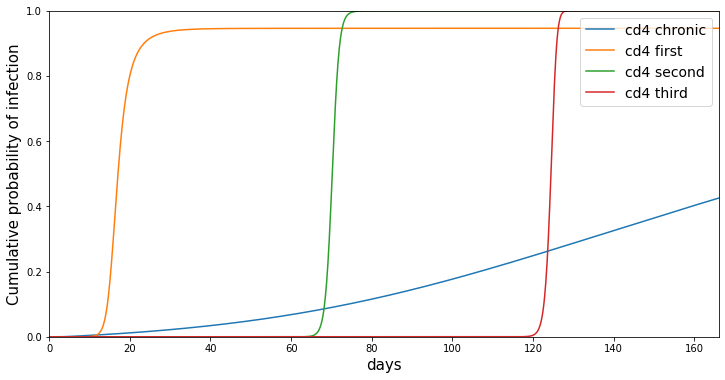

In [269]:
plt.figure(figsize=(12,6))
plt.plot(trimester[trimester.columns[0]],cumulative_prob(trimester['cd4 chronic'],trimester['days'],0.00046)  , label='cd4 chronic')
plt.plot(trimester[trimester.columns[0]],cumulative_prob(trimester['cd4 first'],trimester['days'],0.00046)  , label='cd4 first')
plt.plot(trimester[trimester.columns[0]],cumulative_prob(trimester['cd4 second'],trimester['days'],0.00046)  , label='cd4 second')
plt.plot(trimester[trimester.columns[0]],cumulative_prob(trimester['cd4 third'],trimester['days'],0.00046)  , label='cd4 third')

#plt.title('Maternal primary infection with immune suppression level ϵS = 0.7',fontsize=14)
plt.ylabel('Cumulative probability of infection',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=2)
plt.rc('axes', labelsize=15)
plt.ylim(ymax=1,ymin=0)
plt.legend(loc=1,fontsize=14)
#plt.savefig(r'C:\Users\pc\Desktop\cmv\Maternal primary infection with immune suppression level ϵS = 0.7.png')
plt.xlabel('days')
plt.show()

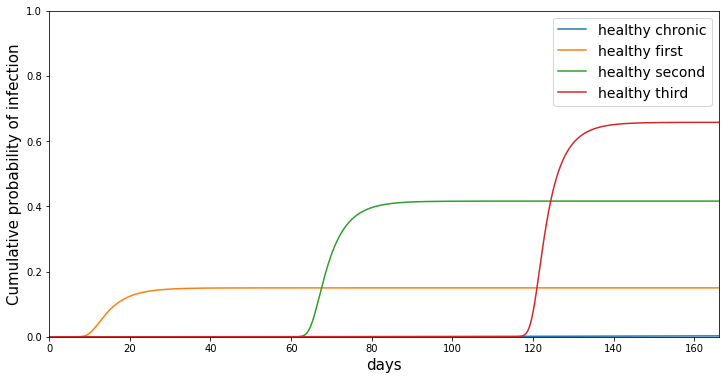

In [268]:
plt.figure(figsize=(12,6))
plt.plot(trimester[trimester.columns[0]],cumulative_prob(trimester['healthy chronic'],trimester['days'],0.00046)  , label='healthy chronic')
plt.plot(trimester[trimester.columns[0]],cumulative_prob(trimester['healthy first'],trimester['days'],0.00046)  , label='healthy first')
plt.plot(trimester[trimester.columns[0]],cumulative_prob(trimester['healthy second'],trimester['days'],0.00046)  , label='healthy second')
plt.plot(trimester[trimester.columns[0]],cumulative_prob(trimester['healthy third'],trimester['days'],0.00046)  , label='healthy third')

#plt.title('Maternal primary infection with immune suppression level ϵS = 0.7',fontsize=14)
plt.ylabel('Cumulative probability of infection',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=2)
plt.rc('axes', labelsize=15)
plt.ylim(ymax=1,ymin=0)
plt.legend(loc=1,fontsize=14)
#plt.savefig(r'C:\Users\pc\Desktop\cmv\Maternal primary infection with immune suppression level ϵS = 0.7.png')

plt.xlabel('days')
plt.show()

In [273]:
cumulative_prob(trimester['healthy chronic'],trimester['days'],0.00046)[-1]*100

0.283634178915404